In [17]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
# For random number generation
from scipy.stats import randint, uniform

from sklearn.experimental import enable_halving_search_cv # Allow importing the experimental HalvingGridSearchCV

# Metrics and auxiliar libraries from sklearn.
from sklearn.model_selection import train_test_split, HalvingRandomSearchCV, RepeatedStratifiedKFold, HalvingGridSearchCV, StratifiedKFold

# Some auxiliary functions for scoring.
import scoring_utils

#DEV
import importlib as imp


In [3]:
# Import the dataframe cleaned and encoded during the feature importance process.
df = pd.read_csv('../data/df_encoded_with_interest_rate.csv')

/var/folders/41/hgg8f6_j1dj4y4mt0w22d8ym0000gn/T/ipykernel_45950/4226268649.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/df_encoded_with_interest_rate.csv')


In [6]:
features = ['NAICS', 'Term', 'NoEmp', 'isNewBusiness', 'isFranchise', 'UrbanRural', 'RevLineCr','LowDoc', 'GrAppv', 'SBARatio', 'NAICS_i', 'InterestRate']
target = 'Default'

In [7]:
df[features].describe()

,NAICS,Term,NoEmp,isNewBusiness,isFranchise,UrbanRural,RevLineCr,LowDoc,GrAppv,SBARatio,NAICS_i,InterestRate
count,870514.000000,870514.000000,870514.000000,870514.000000,870514.000000,870514.000000,870514.000000,870514.000000,8.705140e+05,870514.000000,870514.000000,870514.000000
mean,397670.284370,111.508946,11.479750,0.282303,0.058415,0.754880,0.229363,0.123910,1.951101e+05,0.711526,39.514401,3.927766
std,264128.651724,79.177488,74.589471,0.450120,0.234526,0.647823,0.420424,0.329479,2.843112e+05,0.173216,26.364679,2.187424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,0.028140,0.000000,0.070000
25%,235110.000000,60.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+04,0.500000,23.000000,1.810000
50%,445310.000000,84.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.400000e+04,0.750000,44.000000,4.490000
75%,561740.000000,120.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.300000e+05,0.850000,56.000000,5.310000
max,928120.000000,569.000000,9999.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000e+06,1.000000,92.000000,19.100000


In [85]:
X_total = df[features]
y_total = df[target]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], train_size=.9)

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)

In [88]:
X_train_scaled.describe()

,NAICS,Term,NoEmp,isNewBusiness,isFranchise,UrbanRural,RevLineCr,LowDoc,GrAppv,SBARatio,NAICS_i,InterestRate
count,7.834620e+05,7.834620e+05,7.834620e+05,7.834620e+05,7.834620e+05,7.834620e+05,7.834620e+05,7.834620e+05,7.834620e+05,7.834620e+05,7.834620e+05,7.834620e+05
mean,-6.348488e-18,-6.068248e-17,8.017233e-18,3.829045e-17,5.543590e-17,-5.346334e-17,-1.949893e-19,-2.090920e-17,-1.683256e-17,4.605148e-16,-9.782113e-17,1.330099e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.505500e+00,-1.408512e+00,-1.526401e-01,-6.268514e-01,-2.490129e-01,-1.165012e+00,-5.454086e-01,-3.762871e-01,-6.824964e-01,-3.944619e+00,-1.498676e+00,-1.763853e+00
25%,-6.156587e-01,-6.507939e-01,-1.260351e-01,-6.268514e-01,-2.490129e-01,-1.165012e+00,-5.454086e-01,-3.762871e-01,-5.628819e-01,-1.220737e+00,-6.265846e-01,-9.683414e-01
50%,1.799036e-01,-3.477067e-01,-9.943023e-02,-6.268514e-01,-2.490129e-01,3.781255e-01,-5.454086e-01,-3.762871e-01,-3.570746e-01,2.224254e-01,1.696729e-01,2.569295e-01
75%,6.205663e-01,1.069241e-01,-1.961548e-02,1.595274e+00,-2.490129e-01,3.781255e-01,-5.454086e-01,-3.762871e-01,1.231423e-01,7.996902e-01,6.246772e-01,6.318258e-01
max,2.007237e+00,5.777180e+00,1.328586e+02,1.595274e+00,4.015856e+00,1.921263e+00,1.833488e+00,2.657546e+00,1.690435e+01,1.665587e+00,1.989690e+00,6.936485e+00


In [90]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features)
X_total_scaled = pd.DataFrame(scaler.transform(X_total), columns=features)

# Logit regression

In [93]:
from sklearn.linear_model import LogisticRegression

default_logit = LogisticRegression(
    n_jobs=-1,
    class_weight='balanced',
    solver='saga',
    max_iter=1000
).fit(X_train_scaled, y_train)

yhat_train = default_logit.predict_proba(X_train_scaled)[:,:1]
yhat_test = default_logit.predict_proba(X_test_scaled)[:,:1]
yhat_total = default_logit.predict_proba(X_total_scaled)


/Users/alemalvarez/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [97]:
yhat_total = yhat_total[:,:1]

In [98]:
from sklearn.metrics import mean_squared_error, recall_score

score = pd.concat((
    scoring_utils.get_metrics(y_train, (yhat_train>.5), "Train"),
    scoring_utils.get_metrics(y_test, (yhat_test>.5), "Test"),
    scoring_utils.get_metrics(y_total, (yhat_total>.5), "Total")
))

score

,Recall,Precision,ROC,F1
Train,0.179354,0.050549,0.241422,0.078870
Test,0.179997,0.051211,0.242087,0.079736
Total,0.179418,0.050615,0.241489,0.078956


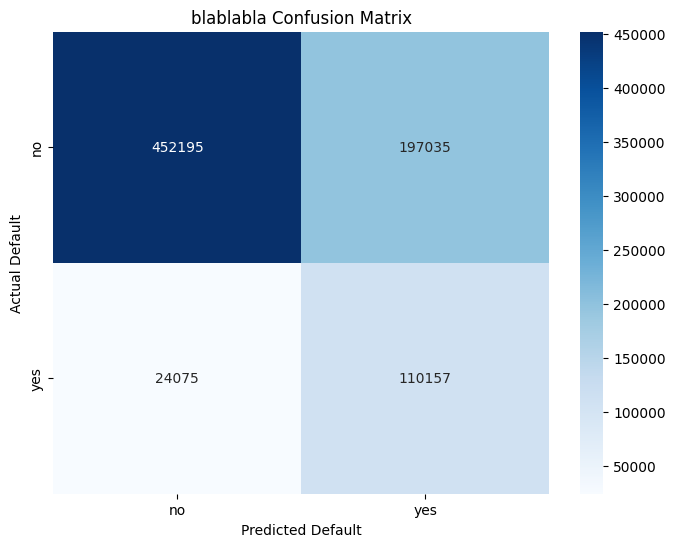

In [99]:
scoring_utils.get_confusion_matrix(y_train, (yhat_train<.5), "blablabla")

In [ ]:
scori

In [59]:
default_logit.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']  # Solvers for optimization
}

# Perform grid search with stratified k-fold cross-validation (e.g., 3-fold cross-validation)
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=9)
grid_search = HalvingGridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=stratified_kfold, scoring='recall', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

In [27]:
scoring_utils.get_best_kernels(grid_search.cv_results_)

,params,mean_test_score,mean_fit_time
kernel,,,
10_newton-cg,"{'C': 10, 'solver': 'newton-cg'}",0.202812,2.882007
1_newton-cg,"{'C': 1, 'solver': 'newton-cg'}",0.202346,1.961027
0.1_newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.202150,3.041077
100_newton-cg,"{'C': 100, 'solver': 'newton-cg'}",0.201829,3.012851
0.01_newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.200559,3.074656
10_newton-cg,"{'C': 10, 'solver': 'newton-cg'}",0.199004,5.235775
1_newton-cg,"{'C': 1, 'solver': 'newton-cg'}",0.198938,8.561114
0.1_newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.198781,10.038622
100_newton-cg,"{'C': 100, 'solver': 'newton-cg'}",0.198693,9.912457


In [ ]:
logit = grid_search.best_estimator_

yhat_test = logit.predict(X_test)
yhat_total = logit.predict(X_total)